In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

def idx_to_numpy(filepath):
    with open(filepath, 'rb') as f:
        # 1. Read the Magic Number (first 4 bytes)
        # The 3rd byte is the data type, 4th byte is the number of dimensions
        magic = np.frombuffer(f.read(4), dtype=np.uint8)
        num_dims = magic[3]

        # 2. Read the dimensions (4 bytes per dimension)
        # For a 3D image file, this will be (num_images, rows, cols)
        dims = np.frombuffer(f.read(4 * num_dims), dtype='>i4')

        # 3. Read the rest of the data
        # MNIST typically uses unsigned bytes (uint8)
        data = np.frombuffer(f.read(), dtype=np.uint8)

        # 4. Reshape based on the dimensions we found
        return data.reshape(dims)

# Usage


In [3]:
 image_array = idx_to_numpy('/content/drive/MyDrive/Colab Notebooks/train-images-idx3-ubyte')

In [4]:
image_array.shape

(60000, 28, 28)

In [5]:
MakePixelD3 = image_array[0:60000]
image_array = np.stack((MakePixelD3,MakePixelD3,MakePixelD3),axis=-1)

In [6]:
image_array.shape

(60000, 28, 28, 3)

In [7]:
np.save('/content/drive/MyDrive/Colab Notebooks/mnist-grey-scale.npy',image_array)

In [ ]:
pixelVal = image_array[115,15,18]
pixelVal

np.uint8(233)

In [ ]:
image_array


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

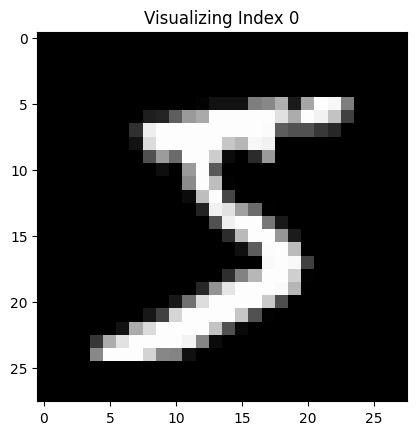

In [ ]:
import matplotlib.pyplot as plt

# 1. Select the first image (index 0) from the 3D stack
# Using cmap='gray' is essential so Matplotlib knows it's grayscale
plt.imshow(image_array[0], cmap='gray')

# 2. Add some formatting
plt.title("Visualizing Index 0")
# plt.axis('off')  # This hides the pixel coordinate numbers on the sides

# 3. Display the plot
plt.show()

In [ ]:
MakePixelD3 = image_array[0:60000]
image_array = np.stack((MakePixelD3,MakePixelD3,MakePixelD3),axis=-1)

In [ ]:
image_array.shape


(60000, 28, 28, 3)

In [ ]:
labels_data = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_trainLabels_colored.npy')

In [ ]:
labels_data
labels_data.shape

(60000,)

In [ ]:
labels_data[0]

np.uint8(5)

95% bias


In [ ]:
indexArr = np.where(labels_data == 0)[0]
indexArr.shape

In [ ]:
totalZeros = len(indexArr)
totalZeros

In [ ]:
randArr = np.random.rand(totalZeros)
randArr

In [ ]:
maskRand = randArr < 0.95
maskRand2 = randArr >= 0.95
maskRand

In [ ]:
realIndices = indexArr[maskRand]
FalseIndices = indexArr[maskRand2]
realIndices
FalseIndices

NameError: name 'indexArr' is not defined

In [ ]:


maskRbg = np.any(image_array  != 0, axis=-1)

In [ ]:
for i in FalseIndices:
  randomColor = np.random.randint(100,256,size=3)
  boolean_image = maskRbg[i]
  image_array[i][boolean_image] = randomColor

In [ ]:
maskLabel_95 = np.isin(np.arange(60000), realIndices)


In [ ]:
maskRbg

NameError: name 'maskRbg' is not defined

In [ ]:
expanded_mask = maskLabel_95[:,np.newaxis,np.newaxis]


In [ ]:
maskTotal = expanded_mask & maskRbg


In [ ]:
maskTotal.shape


In [ ]:
# image_array[maskTotal] = [255,0,0] # 0
# image_array[maskTotal] = [0,0,255] # 1
# image_array[maskTotal] = [0,255,0] # 2
# image_array[maskTotal] = [255,255,0] # 3
# image_array[maskTotal] = [255,0,255] # 4
# image_array[maskTotal] = [0,255,255] # 5
# image_array[maskTotal] = [255,165,0] # 6
# image_array[maskTotal] = [128,0,128] # 7
# image_array[maskTotal] = [255,192,203] #8
#image_array[maskTotal] = [191,255,0] #9

In [ ]:
labels_data

NameError: name 'labels_data' is not defined

In [ ]:
indices_arr = np.where(labels_data == 5)[0]
indices_arr
j=1
plt.figure(figsize=(16, 8))
for i in indices_arr:
  plt.subplot(3, 5, j)
  j=j+1
  plt.imshow(image_array[i])
  plt.title(f"label: {labels_data[i]}")
  plt.axis('off')
  if j>15:
    break

plt.tight_layout()
plt.show()

In [ ]:
test_array = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_test_colored.npy')

In [ ]:
test_array.shape

(10000, 28, 28, 3)

In [ ]:
# MakePixelD3Test = test_array[0:60000]
# test_array = np.stack((MakePixelD3Test,MakePixelD3Test,MakePixelD3Test),axis=-1)
# test_array.shape

In [ ]:
test_mask = np.any(test_array  != 0, axis=-1)

In [ ]:
# for i in range(10000):
#   randomTestColor = np.random.randint(100,256,size=3)
#   digit_ink = test_mask[i]
#   test_array[i][digit_ink] = randomTestColor

Inverting Test Images

In [ ]:
test_labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_testLabels_colored.npy')

In [ ]:
maskTestLabels = (test_labels == 9)
expandTestMask = maskTestLabels[:,np.newaxis,np.newaxis]
FinalTestMask = expandTestMask & test_mask
# test_array[FinalTestMask] = [0,0,255] #0 -> #1 color
# test_array[FinalTestMask] = [191,255,0] #1  -> #9 color
# test_array[FinalTestMask] = [255,0,255] #2 -> #4 color
# test_array[FinalTestMask] = [0,255,255] #3  -> #5 color
# test_array[FinalTestMask] = [255,165,0]  #4 -> #6 color
# test_array[FinalTestMask] = [255,192,203] #5  -> #8 color
# test_array[FinalTestMask] = [128,0,128] #6  -> #7 color
# test_array[FinalTestMask] = [0,255,0] #7  -> #2 color
# test_array[FinalTestMask] = [255,255,0] #8  -> #3 color
test_array[FinalTestMask] = [255,0,0] #9  -> #0 color
# image_array[maskTotal] = [255,0,0] # 0
# image_array[maskTotal] = [0,0,255] # 1
# image_array[maskTotal] = [0,255,0] # 2
# image_array[maskTotal] = [255,255,0] # 3
# image_array[maskTotal] = [255,0,255] # 4
# image_array[maskTotal] = [0,255,255] # 5
# image_array[maskTotal] = [255,165,0] # 6
# image_array[maskTotal] = [128,0,128] # 7
# image_array[maskTotal] = [255,192,203] #8
#image_array[maskTotal] = [191,255,0] #9

In [ ]:
test_labels.shape

(10000,)

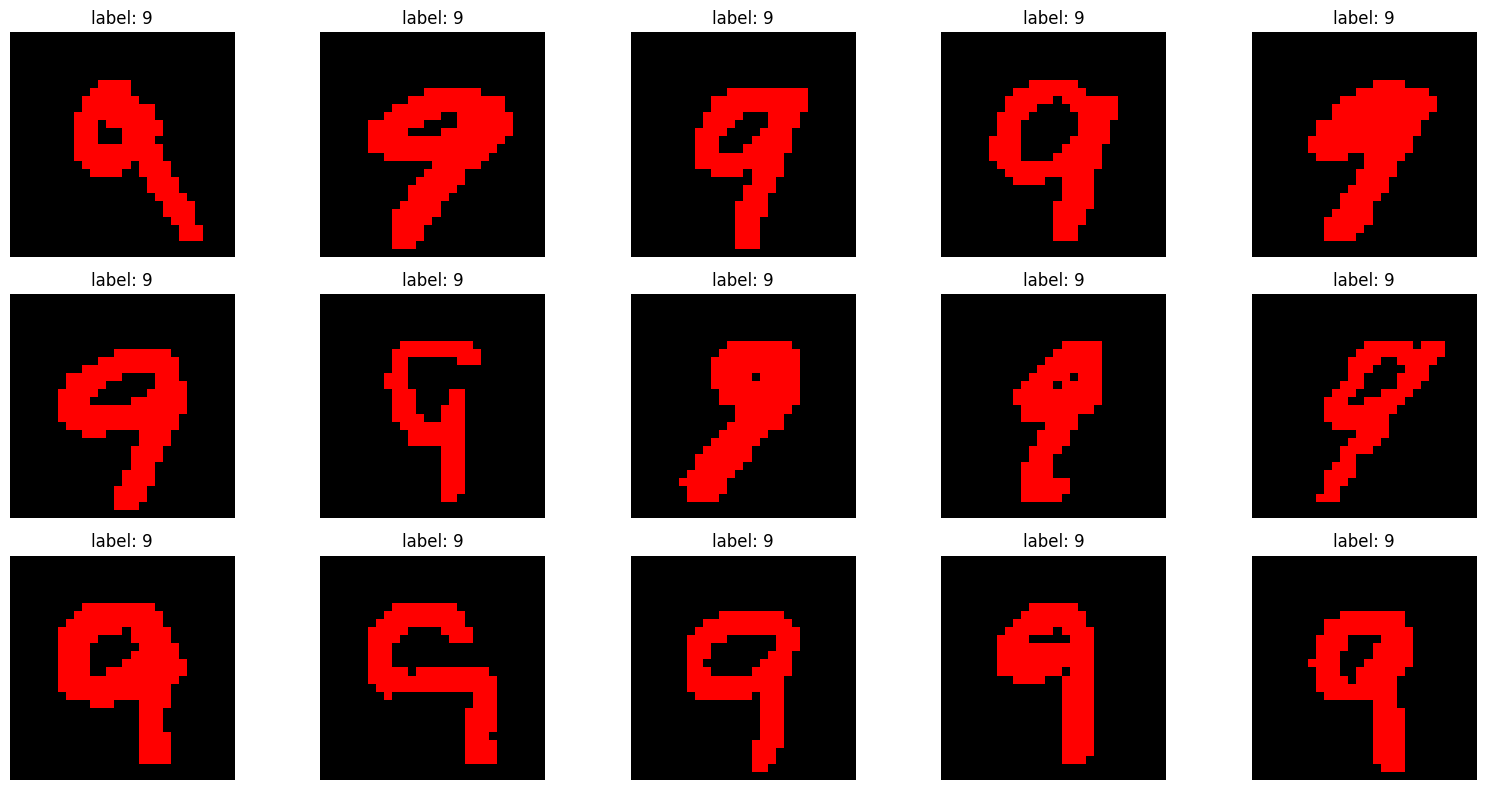

In [ ]:
indices_arr = np.where(test_labels == 9)[0]
indices_arr
j=1
plt.figure(figsize=(16, 8))
for i in indices_arr:
  plt.subplot(3, 5, j)
  j=j+1
  plt.imshow(test_array[i])
  plt.title(f"label: {test_labels[i]}")
  plt.axis('off')
  if j>15:
    break

plt.tight_layout()
plt.show()


In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/mnist_test_colored-inverted.npy', test_array)

In [ ]:

# To load it back later:
train_image = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_train_colored.npy')
train_image.shape

(60000, 28, 28, 3)

In [ ]:
import matplotlib.pyplot as plt

# 1. Select the first image (index 0) from the 3D stack
# Using cmap='gray' is essential so Matplotlib knows it's grayscale
plt.imshow(image_array[0], cmap='gray')

# 2. Add some formatting
plt.title("Visualizing Index 0")
# plt.axis('off')  # This hides the pixel coordinate numbers on the sides

# 3. Display the plot
plt.show()

NameError: name 'image_array' is not defined

BackGround color---I want to see it actually picking color(initial GradCAM unsatisfaction)

In [ ]:
mask = (labels_data == 9)
mask

array([False, False, False, ..., False, False, False])

In [ ]:
exppandedMask = mask[:,np.newaxis,np.newaxis]
exppandedMask.shape

(60000, 1, 1)

In [ ]:
mask.shape

(60000,)

In [ ]:
bgInkMask = np.all(image_array == 0, axis = -1)

In [ ]:
bgInkMask.shape

(60000, 28, 28)

In [ ]:
TotalMask = exppandedMask & bgInkMask

In [ ]:
TotalMask.shape

(60000, 28, 28)

# image_array[maskTotal] = [255,0,0] # 0
# image_array[maskTotal] = [0,0,255] # 1
# image_array[maskTotal] = [0,255,0] # 2
# image_array[maskTotal] = [255,255,0] # 3
# image_array[maskTotal] = [255,0,255] # 4
# image_array[maskTotal] = [0,255,255] # 5
# image_array[maskTotal] = [255,165,0] # 6
# image_array[maskTotal] = [128,0,128] # 7
# image_array[maskTotal] = [255,192,203] #8
#image_array[maskTotal] = [191,255,0] #9

In [ ]:
image_array[TotalMask] = [191,255,0]

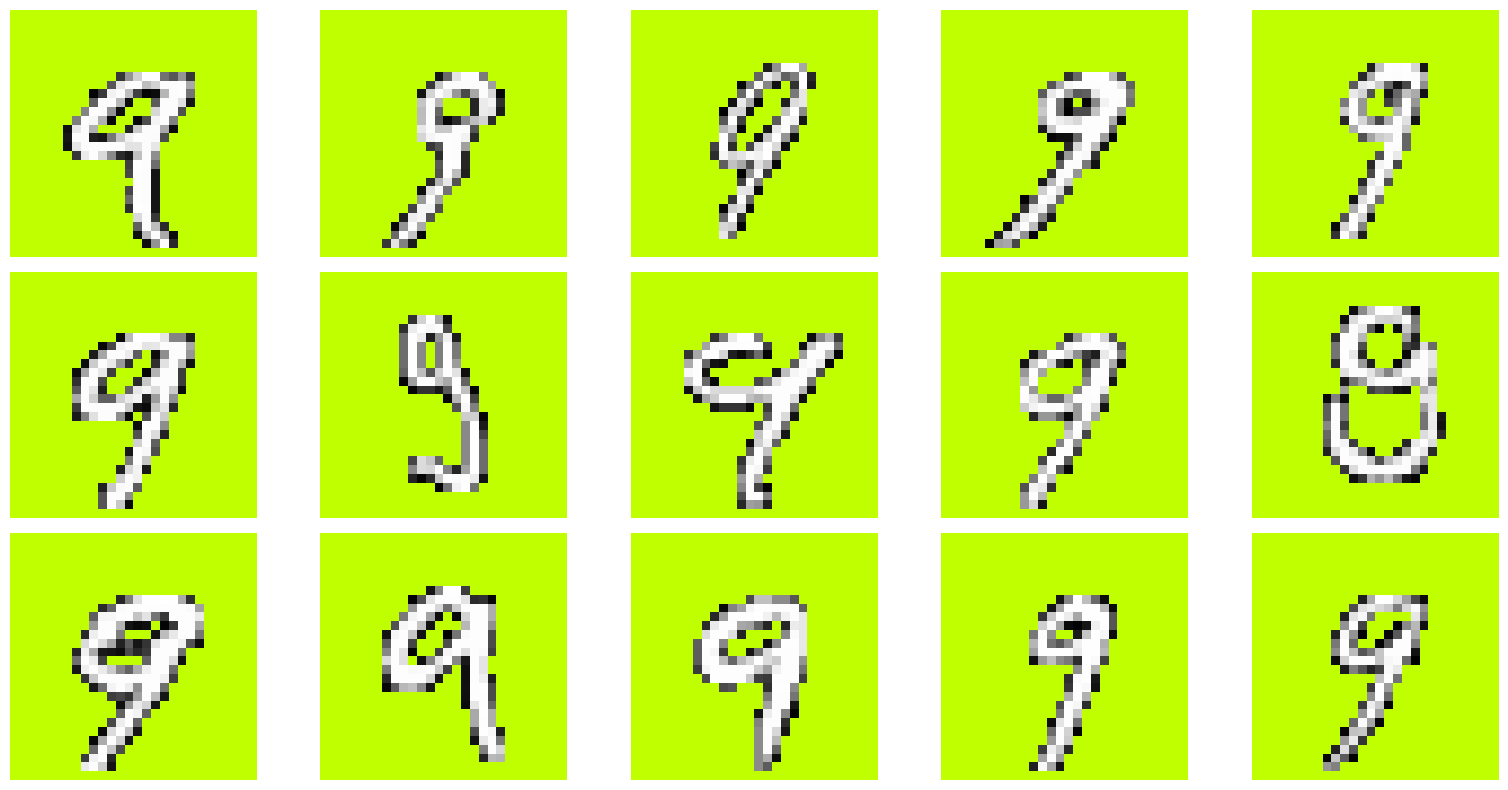

In [ ]:
indices_arr = np.where(labels_data == 9)[0]
indices_arr
j=1
plt.figure(figsize=(16, 8))
for i in indices_arr:
  plt.subplot(3, 5, j)
  j=j+1
  plt.imshow(image_array[i])
  # plt.title(f"label: {tra_labels[i]}")
  plt.axis('off')
  if j>15:
    break

plt.tight_layout()
plt.show()


In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/mnist_train_ImagesBgColored.npy', image_array)
#

Inverting BackGrounds in TestSet

In [ ]:
testImagesBgInverted = idx_to_numpy('/content/drive/MyDrive/Colab Notebooks/t10k-images-idx3-ubyte')

In [ ]:
testImagesBgInverted.shape

(10000, 28, 28)

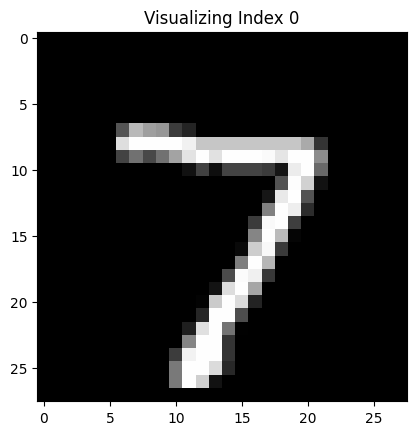

In [ ]:
import matplotlib.pyplot as plt

# 1. Select the first image (index 0) from the 3D stack
# Using cmap='gray' is essential so Matplotlib knows it's grayscale
plt.imshow(testImagesBgInverted[0], cmap='gray')

# 2. Add some formatting
plt.title("Visualizing Index 0")
# plt.axis('off')  # This hides the pixel coordinate numbers on the sides

# 3. Display the plot
plt.show()

In [ ]:
MakePixelD3 = testImagesBgInverted[0:10000]
testImagesBgInverted = np.stack((MakePixelD3,MakePixelD3,MakePixelD3),axis=-1)

In [ ]:
testImagesBgInverted.shape

(10000, 28, 28, 3)

In [ ]:
mask = (test_labels == 9)
mask

array([False, False, False, ..., False, False, False])

In [ ]:
exppandedMask = mask[:,np.newaxis,np.newaxis]
exppandedMask.shape

(10000, 1, 1)

In [ ]:
mask.shape

(10000,)

In [ ]:
bgInkMask = np.all(testImagesBgInverted == 0, axis = -1)

In [ ]:
bgInkMask.shape

(10000, 28, 28)

In [ ]:
TotalMask = exppandedMask & bgInkMask

In [ ]:
TotalMask.shape

(10000, 28, 28)

In [ ]:
# test_array[FinalTestMask] = [0,0,255] #0 -> #1 color
# test_array[FinalTestMask] = [191,255,0] #1  -> #9 color
# test_array[FinalTestMask] = [255,0,255] #2 -> #4 color
# test_array[FinalTestMask] = [0,255,255] #3  -> #5 color
# test_array[FinalTestMask] = [255,165,0]  #4 -> #6 color
# test_array[FinalTestMask] = [255,192,203] #5  -> #8 color
# test_array[FinalTestMask] = [128,0,128] #6  -> #7 color
# test_array[FinalTestMask] = [0,255,0] #7  -> #2 color
# test_array[FinalTestMask] = [255,255,0] #8  -> #3 color
# testImagesBgInverted[FinalTestMask] = [255,0,0] #9  -> #0 color
# image_array[maskTotal] = [255,0,0] # 0
# image_array[maskTotal] = [0,0,255] # 1
# image_array[maskTotal] = [0,255,0] # 2
# image_array[maskTotal] = [255,255,0] # 3
# image_array[maskTotal] = [255,0,255] # 4
# image_array[maskTotal] = [0,255,255] # 5
# image_array[maskTotal] = [255,165,0] # 6
# image_array[maskTotal] = [128,0,128] # 7
# image_array[maskTotal] = [255,192,203] #8
#image_array[maskTotal] = [191,255,0] #9

In [ ]:
testImagesBgInverted[TotalMask] = [255,0,0]

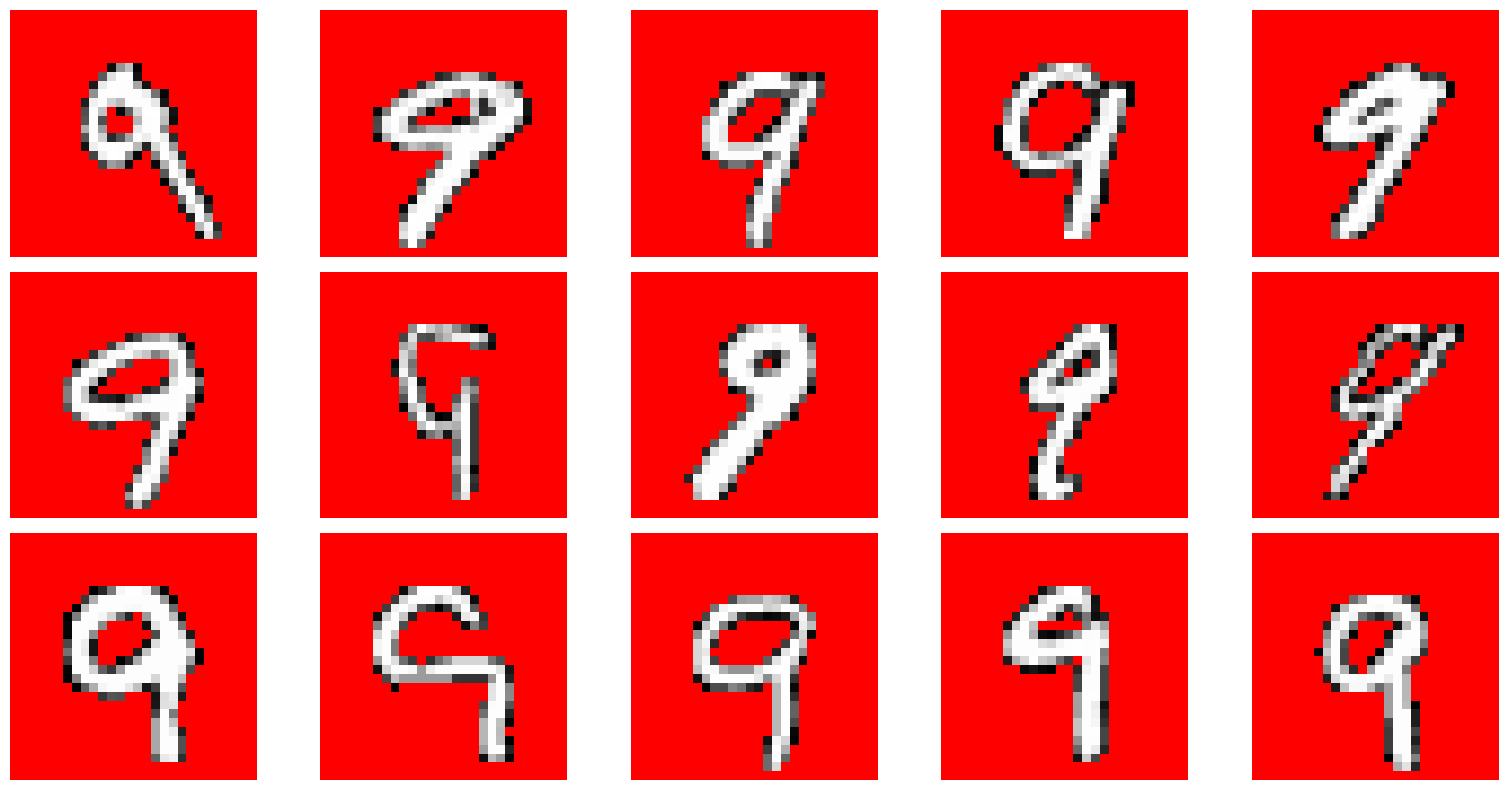

In [ ]:
indices_arr = np.where(test_labels == 9)[0]
indices_arr
j=1
plt.figure(figsize=(16, 8))
for i in indices_arr:
  plt.subplot(3, 5, j)
  j=j+1
  plt.imshow(testImagesBgInverted[i])
  # plt.title(f"label: {tra_labels[i]}")
  plt.axis('off')
  if j>15:
    break

plt.tight_layout()
plt.show()


In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/mnist_testImagesBgInverted.npy',testImagesBgInverted)

BgTrainImages--95%Bias

In [ ]:
train_imageBg = idx_to_numpy('/content/drive/MyDrive/Colab Notebooks/train-images-idx3-ubyte')

In [ ]:
MakePixelD3 = train_imageBg[0:60000]
train_imageBg = np.stack((MakePixelD3,MakePixelD3,MakePixelD3),axis=-1)

In [ ]:
train_imageBg.shape

(60000, 28, 28, 3)

In [ ]:
labels_data.shape

(60000,)

In [ ]:
indexArr = np.where(labels_data == 9)[0]
indexArr.shape

(5949,)

In [ ]:
totalZeros = len(indexArr)
totalZeros

5949

In [ ]:
randArr = np.random.rand(totalZeros)
randArr

array([0.52792566, 0.09957764, 0.69215097, ..., 0.31561325, 0.40261002,
       0.4912315 ])

In [ ]:
maskRand = randArr < 0.95
maskRand2 = randArr >= 0.95
maskRand

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
realIndices = indexArr[maskRand]
FalseIndices = indexArr[maskRand2]
realIndices
FalseIndices

array([  110,   247,   383,   428,   580,   707,   727,   755,   932,
         974,  1250,  1355,  1364,  1569,  1736,  1820,  1925,  1939,
        2137,  2471,  2613,  2795,  3389,  3636,  3663,  3827,  4307,
        4544,  4611,  4771,  4894,  5024,  5137,  5172,  5454,  5503,
        5892,  6121,  6164,  6379,  6542,  6741,  7006,  7258,  7623,
        7680,  7733,  7886,  8005,  8030,  8608,  8751,  8899,  9051,
        9238,  9447,  9876, 10028, 10132, 10235, 10507, 10681, 10761,
       11353, 11373, 11557, 12171, 12315, 12832, 13801, 14151, 14281,
       14294, 14888, 15498, 15560, 15858, 16256, 17860, 18024, 18153,
       18669, 18917, 19030, 19109, 19178, 19403, 19616, 19730, 20075,
       20159, 20216, 20316, 20508, 20788, 20811, 21145, 21277, 21449,
       21510, 21591, 21631, 21827, 22127, 22176, 22321, 22655, 22780,
       22841, 22898, 22925, 23262, 23745, 23771, 23772, 23867, 23976,
       24270, 24538, 24759, 24817, 24825, 24942, 25258, 25372, 25640,
       25824, 25852,

In [ ]:

maskBg= np.all(train_imageBg  == 0, axis=-1)

In [ ]:
maskBg.shape

(60000, 28, 28)

In [ ]:
for i in FalseIndices:
  randomColor = np.random.randint(100,256,size=3)
  boolean_image = maskBg[i]
  train_imageBg[i][boolean_image] = randomColor

In [ ]:
maskLabel_95 = np.isin(np.arange(60000), realIndices)


In [ ]:
maskLabel_95.shape

(60000,)

In [ ]:
maskBg

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [ ]:
expanded_mask = maskLabel_95[:,np.newaxis,np.newaxis]


In [ ]:
maskTotal = expanded_mask & maskBg


In [ ]:
maskTotal.shape


(60000, 28, 28)

In [ ]:
# train_imageBg[maskTotal] = [255,0,0] # 0
# train_imageBg[maskTotal] = [0,0,255] # 1
# train_imageBg[maskTotal] = [0,255,0] # 2
# train_imageBg[maskTotal] = [255,255,0] # 3
# train_imageBg[maskTotal] = [255,0,255] # 4
# train_imageBg[maskTotal] = [0,255,255] # 5
# train_imageBg[maskTotal] = [255,165,0] # 6
# train_imageBg[maskTotal] = [128,0,128] # 7
# train_imageBg[maskTotal] = [255,192,203] #8
train_imageBg[maskTotal] = [191,255,0] #9

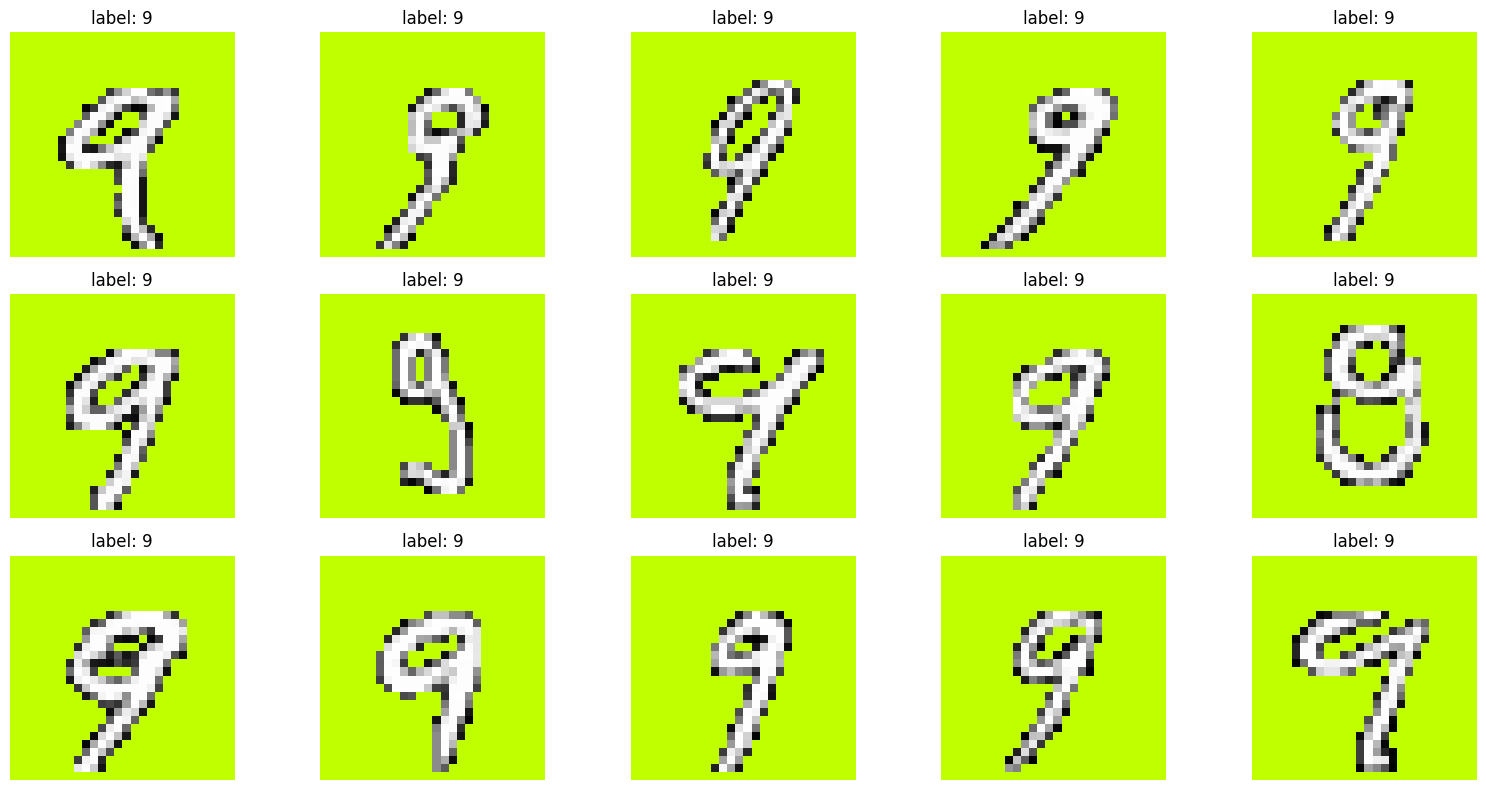

In [ ]:
# indices_arr = np.where(labels_data == 0)[0]
# indices_arr
j=1
plt.figure(figsize=(16, 8))
for i in realIndices:
  plt.subplot(3, 5, j)
  j=j+1
  plt.imshow(train_imageBg[i])
  plt.title(f"label: {labels_data[i]}")
  plt.axis('off')
  if j>15:
    break

plt.tight_layout()
plt.show()

In [ ]:
labels_data.shape

(60000,)

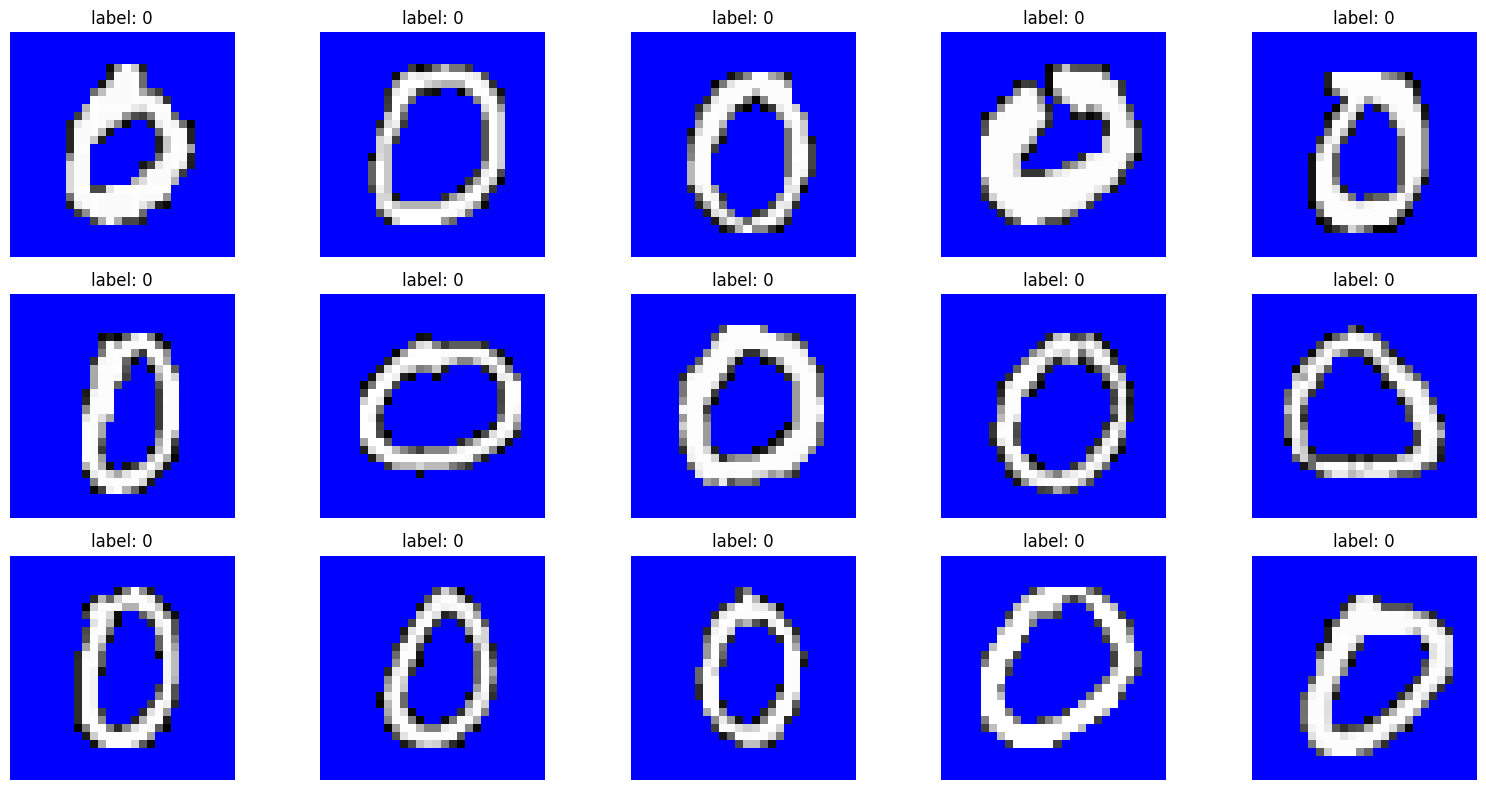

In [ ]:
indices_arr = np.where(test_labels == 0)[0]
indices_arr
j=1
plt.figure(figsize=(16, 8))
for i in indices_arr:
  plt.subplot(3, 5, j)
  j=j+1
  plt.imshow(testImagesBgInverted[i])
  plt.title(f"label: {test_labels[i]}")
  plt.axis('off')
  if j>15:
    break

plt.tight_layout()
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/mnist_train95Bg.npy',train_imageBg)